In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)
import plotly.graph_objects as go

## Import Data Set

In [3]:
data = pd.read_csv('heart_attack_dataset.csv')

## Data Preprocessing

In [4]:
data.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [5]:
data.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,60.338,17.317496,30.0,45.0,60.5,76.0,89.0
Blood Pressure (mmHg),1000.0,145.440,31.756525,90.0,118.0,146.0,173.0,199.0
Cholesterol (mg/dL),1000.0,223.789,42.787817,150.0,185.0,225.5,259.0,299.0


In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

Gender                     2
Age                       60
Blood Pressure (mmHg)    109
Cholesterol (mg/dL)      149
Has Diabetes               2
Smoking Status             3
Chest Pain Type            4
Treatment                  4
dtype: int64

In [10]:
numeric_data = data.select_dtypes(include=['number'])

In [11]:
numeric_data

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
0,70,181,262
1,55,103,253
2,42,95,295
3,84,106,270
4,86,187,296
...,...,...,...
995,42,125,193
996,80,186,267
997,64,108,174
998,84,123,195


In [12]:
object_data = data.select_dtypes(include=['object'])

In [13]:
object_data

,Gender,Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,No,Never,Typical Angina,Lifestyle Changes
1,Female,Yes,Never,Atypical Angina,Angioplasty
2,Male,Yes,Current,Typical Angina,Angioplasty
3,Male,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,Yes,Current,Non-anginal Pain,Medication
...,...,...,...,...,...
995,Male,Yes,Current,Typical Angina,Angioplasty
996,Male,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
997,Female,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG)
998,Female,No,Current,Asymptomatic,Lifestyle Changes


## Correlation Analysis

In [14]:
corr_m = numeric_data.corr()

In [15]:
corr_m

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
Age,1.000000,-0.003303,0.001661
Blood Pressure (mmHg),-0.003303,1.000000,0.044316
Cholesterol (mg/dL),0.001661,0.044316,1.000000


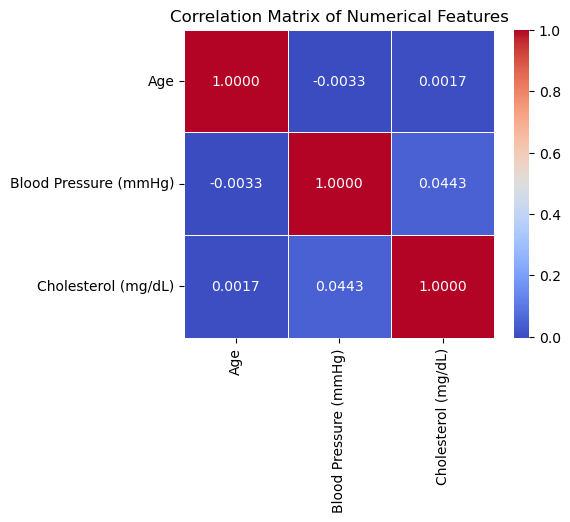

In [16]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

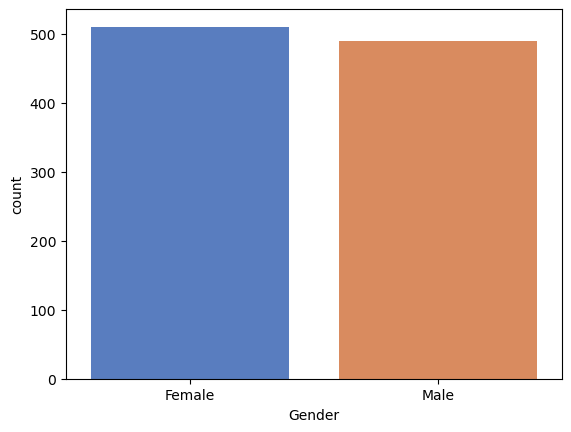

In [20]:
sns.countplot(x='Gender',data=data,palette='muted',order=['Female', 'Male'])
plt.show()

In [21]:
data['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

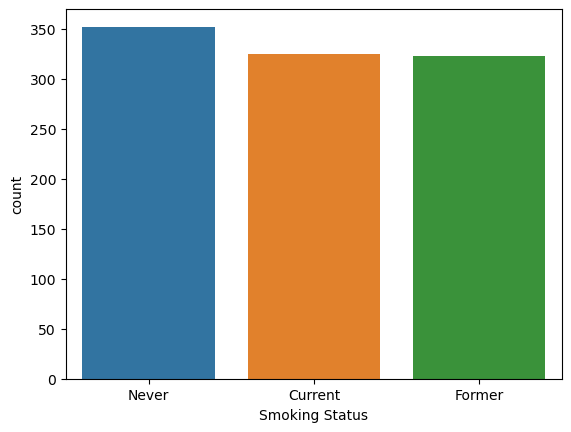

In [23]:
sns.countplot(x='Smoking Status',data=data)
plt.show()

In [39]:
gen_dia = data.groupby(['Gender','Has Diabetes']).size().reset_index(name='count')
gen_dia

,Gender,Has Diabetes,count
0,Female,No,239
1,Female,Yes,271
2,Male,No,244
3,Male,Yes,246


In [44]:
fig = px.bar(gen_dia,x='Gender',y='count',color='Has Diabetes',color_discrete_sequence=['#8A2BE2', '#DA70D6'])
fig.show()

In [45]:
gen_smo = data.groupby(['Gender','Smoking Status']).size().reset_index(name='count')
gen_smo

,Gender,Smoking Status,count
0,Female,Current,173
1,Female,Former,166
2,Female,Never,171
3,Male,Current,152
4,Male,Former,157
5,Male,Never,181


In [47]:
fig = px.bar(gen_smo,x='Gender',y='count',color='Smoking Status',color_discrete_sequence=['#8A2BE2', '#DA70D6','#D8BFD8'])
fig.show()

In [48]:
fig = px.scatter(
    data,
    x='Age',
    y='Cholesterol (mg/dL)',
    color='Age',  
    color_continuous_scale='Viridis',  
    title='Age vs Cholesterol',
    labels={'Age': 'Age', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)', 'Age': 'Age'}
)

fig.update_layout(width=700, height=500)

fig.show()

In [49]:
fig = px.scatter_3d(
    data,
    x='Age',
    y='Blood Pressure (mmHg)',
    z='Cholesterol (mg/dL)',
    color='Age',  
    color_continuous_scale='Viridis',  
    title='Scatter Plot of Age, Blood Pressure, and Cholesterol',
    labels={'Age': 'Age', 'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)'}
)

fig.update_layout(width=800, height=600)

fig.show()

## Conclusion

#### > Age Distribution -> The minimum age is 30 years, while the maximum is 89 years. The average age of individuals in the dataset is approximately 60.34 years. This indicates a wide range of ages with a slightly higher concentration in older adults.
#### > Blood Pressure -> The minimum recorded blood pressure is 90 mmHg, and the maximum is 199 mmHg. The average blood pressure is 145.44 mmHg, suggesting a generally high average blood pressure level among the individuals in the dataset.
#### > Cholesterol Levels -> Cholesterol levels range from a minimum of 150 mg/dL to a maximum of 299 mg/dL. The average cholesterol level is 223.79 mg/dL, indicating that most individuals have elevated cholesterol levels.

## By Lahiru Sadakelum